# Day 46 - Introduction to Neural Networks and Deep Learning

Welcome to the world of Deep Learning! In this lesson, we embark on an exciting journey into neural networks, one of the most powerful and versatile tools in modern machine learning. Neural networks form the foundation of deep learning and have revolutionized fields ranging from computer vision to natural language processing.

In [ ]:
# Packages required for this lesson
# !pip install scikit-learn matplotlib numpy pandas seaborn

## Introduction to Neural Networks

Neural Networks are a class of machine learning algorithms inspired by the structure and function of biological neural networks in the human brain. Just as the brain consists of interconnected neurons that process and transmit information, artificial neural networks consist of interconnected nodes (artificial neurons) organized in layers that process data through weighted connections.

### Why Neural Networks Matter

Neural networks have become the backbone of modern artificial intelligence for several compelling reasons:

1. **Universal Function Approximators**: Neural networks can theoretically approximate any continuous function, making them incredibly versatile for modeling complex relationships in data.

2. **Automatic Feature Learning**: Unlike traditional machine learning methods that require manual feature engineering, neural networks can automatically learn hierarchical representations of data, discovering features at multiple levels of abstraction.

3. **Scalability**: Neural networks can handle massive amounts of data and continue to improve their performance as more data becomes available, making them ideal for big data applications.

4. **Wide Applicability**: From image recognition and speech processing to game playing and autonomous vehicles, neural networks have demonstrated remarkable success across diverse domains.

### Learning Objectives

By the end of this lesson, you will be able to:

- Understand the biological inspiration behind artificial neural networks
- Explain the structure and components of a neural network (neurons, layers, weights, biases)
- Comprehend the role of activation functions in neural networks
- Understand forward propagation and how neural networks make predictions
- Implement a basic neural network using scikit-learn's MLPClassifier
- Visualize and interpret neural network decision boundaries
- Apply neural networks to real-world classification problems

## Biological Inspiration: From Brain to Algorithm

### The Biological Neuron

The human brain contains approximately 86 billion neurons, each connected to thousands of other neurons through structures called synapses. A biological neuron receives electrical signals from other neurons through dendrites, processes these signals in the cell body, and transmits the output through its axon to other neurons.

The neuron "fires" (sends a signal) when the combined input signals exceed a certain threshold. This simple yet powerful mechanism allows the brain to process information, learn from experience, and make decisions.

### The Artificial Neuron (Perceptron)

In 1958, Frank Rosenblatt introduced the **Perceptron**, the first artificial neuron model. The perceptron mimics the behavior of biological neurons by:

1. Receiving multiple input signals ($x_1, x_2, ..., x_n$)
2. Multiplying each input by a weight ($w_1, w_2, ..., w_n$)
3. Summing the weighted inputs and adding a bias term ($b$)
4. Passing the result through an activation function to produce an output

Mathematically, a single neuron computes:

$$z = \sum_{i=1}^{n} w_i x_i + b = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b$$

$$y = f(z)$$

Where:
- $x_i$ are the input features
- $w_i$ are the weights (learned parameters that determine the importance of each input)
- $b$ is the bias (learned parameter that shifts the activation function)
- $z$ is the weighted sum (also called the pre-activation)
- $f(z)$ is the activation function
- $y$ is the output of the neuron

## Neural Network Architecture

A neural network is constructed by organizing neurons into **layers**. A typical feedforward neural network consists of:

### 1. Input Layer
The input layer receives the raw features from your dataset. Each neuron in this layer represents one feature. For example, if you're classifying images of 28×28 pixels, you might have 784 input neurons (one for each pixel).

### 2. Hidden Layer(s)
Hidden layers are where the "magic" happens. These layers perform transformations on the input data, learning to extract increasingly abstract features. A network can have one or more hidden layers:
- **Shallow networks**: 1-2 hidden layers
- **Deep networks**: 3 or more hidden layers (hence "deep learning")

Each neuron in a hidden layer is connected to all neurons in the previous layer, receives weighted inputs, and applies an activation function.

### 3. Output Layer
The output layer produces the final prediction. The number of neurons in this layer depends on your task:
- **Binary classification**: 1 neuron (outputs probability of positive class)
- **Multi-class classification**: K neurons (one for each class)
- **Regression**: 1 or more neurons (depending on the number of target variables)

### Network Representation

We can represent the entire network's computation as a series of matrix operations. For a network with one hidden layer:

$$\mathbf{h} = f_1(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1)$$

$$\mathbf{y} = f_2(\mathbf{W}_2 \mathbf{h} + \mathbf{b}_2)$$

Where:
- $\mathbf{x}$ is the input vector
- $\mathbf{W}_1, \mathbf{b}_1$ are the weights and biases of the first layer
- $\mathbf{h}$ is the hidden layer activation
- $\mathbf{W}_2, \mathbf{b}_2$ are the weights and biases of the second layer
- $f_1, f_2$ are activation functions
- $\mathbf{y}$ is the output

## Activation Functions: Introducing Non-Linearity

Activation functions are crucial components of neural networks. Without them, a multi-layer neural network would be equivalent to a single-layer linear model, regardless of how many layers it has. Activation functions introduce **non-linearity**, enabling neural networks to learn complex patterns.

### Common Activation Functions

#### 1. Sigmoid Function

The sigmoid function (also called logistic function) squashes its input to a value between 0 and 1:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Properties:**
- Output range: (0, 1)
- Smooth gradient
- Historically popular but less used now due to vanishing gradient problem
- Useful for output layer in binary classification

#### 2. Hyperbolic Tangent (tanh)

The tanh function squashes its input to a value between -1 and 1:

$$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$

**Properties:**
- Output range: (-1, 1)
- Zero-centered (unlike sigmoid)
- Stronger gradients than sigmoid

#### 3. Rectified Linear Unit (ReLU)

ReLU is the most popular activation function in modern deep learning:

$$\text{ReLU}(z) = \max(0, z) = \begin{cases} z & \text{if } z > 0 \\ 0 & \text{if } z \leq 0 \end{cases}$$

**Properties:**
- Output range: [0, ∞)
- Computationally efficient
- Helps mitigate vanishing gradient problem
- Can suffer from "dying ReLU" problem (neurons that always output 0)

#### 4. Softmax (for output layer)

Softmax is typically used in the output layer for multi-class classification:

$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

**Properties:**
- Converts outputs to probability distribution (all outputs sum to 1)
- Each output is between 0 and 1
- Emphasizes the largest values

## Forward Propagation: Making Predictions

**Forward propagation** is the process by which a neural network transforms input data into output predictions. It's called "forward" because information flows from input to output, layer by layer.

### The Forward Pass Algorithm

For each layer $l$ in the network:

1. Compute the weighted sum: $\mathbf{z}^{[l]} = \mathbf{W}^{[l]} \mathbf{a}^{[l-1]} + \mathbf{b}^{[l]}$
2. Apply activation function: $\mathbf{a}^{[l]} = f^{[l]}(\mathbf{z}^{[l]})$

Where:
- $\mathbf{a}^{[0]} = \mathbf{x}$ (input)
- $\mathbf{a}^{[L]}$ is the final output (where $L$ is the number of layers)

### Example: Three-Layer Network

Let's walk through a concrete example with a network that has:
- Input layer: 3 features
- Hidden layer 1: 4 neurons with ReLU activation
- Hidden layer 2: 4 neurons with ReLU activation  
- Output layer: 2 neurons with softmax activation (binary classification)

**Layer 1 (Input → Hidden 1):**
$$\mathbf{z}^{[1]} = \mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}^{[1]}$$
$$\mathbf{a}^{[1]} = \text{ReLU}(\mathbf{z}^{[1]})$$

**Layer 2 (Hidden 1 → Hidden 2):**
$$\mathbf{z}^{[2]} = \mathbf{W}^{[2]} \mathbf{a}^{[1]} + \mathbf{b}^{[2]}$$
$$\mathbf{a}^{[2]} = \text{ReLU}(\mathbf{z}^{[2]})$$

**Layer 3 (Hidden 2 → Output):**
$$\mathbf{z}^{[3]} = \mathbf{W}^{[3]} \mathbf{a}^{[2]} + \mathbf{b}^{[3]}$$
$$\mathbf{y} = \text{softmax}(\mathbf{z}^{[3]})$$

The final output $\mathbf{y}$ gives us the predicted probabilities for each class.

## Python Implementation

Now let's see neural networks in action! We'll use scikit-learn's `MLPClassifier` (Multi-Layer Perceptron Classifier) to implement neural networks. While libraries like TensorFlow and PyTorch offer more flexibility, scikit-learn provides an excellent introduction with a familiar API.

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### Visualizing Activation Functions

Let's visualize the activation functions we discussed to understand their behavior:

Activation Function Comparison:
Sigmoid: Smooth S-curve, outputs (0,1), good for probabilities
Tanh:    Smooth S-curve, outputs (-1,1), zero-centered
ReLU:    Simple threshold, outputs [0,∞), most popular for hidden layers


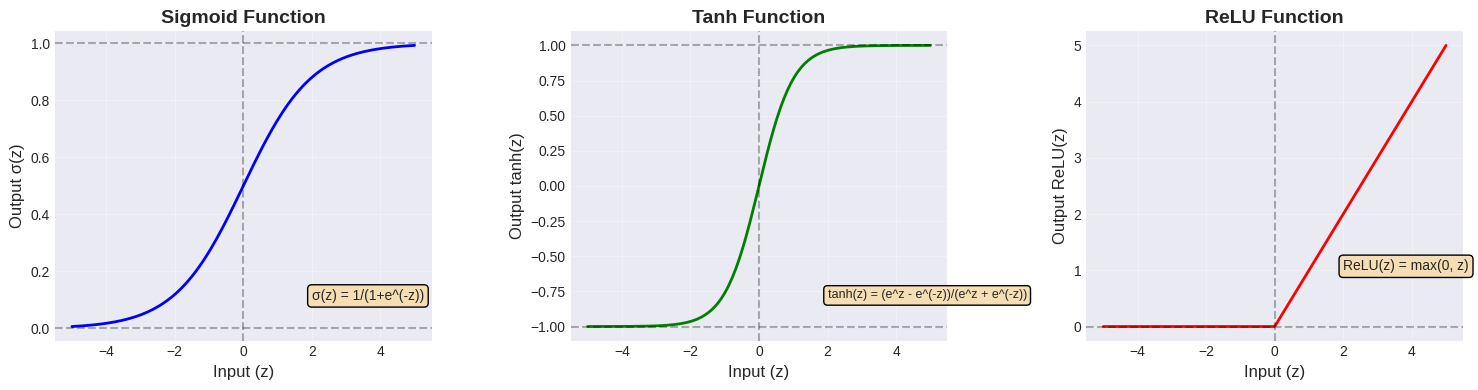

In [10]:
# Define activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

# Generate input values
z = np.linspace(-5, 5, 200)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot Sigmoid
axes[0].plot(z, sigmoid(z), 'b-', linewidth=2)
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0].axhline(y=1, color='k', linestyle='--', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[0].grid(True, alpha=0.3)
axes[0].set_title('Sigmoid Function', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Input (z)', fontsize=12)
axes[0].set_ylabel('Output σ(z)', fontsize=12)
axes[0].text(2, 0.1, 'σ(z) = 1/(1+e^(-z))', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat'))

# Plot Tanh
axes[1].plot(z, tanh(z), 'g-', linewidth=2)
axes[1].axhline(y=-1, color='k', linestyle='--', alpha=0.3)
axes[1].axhline(y=1, color='k', linestyle='--', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[1].set_title('Tanh Function', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Input (z)', fontsize=12)
axes[1].set_ylabel('Output tanh(z)', fontsize=12)
axes[1].text(2, -0.8, 'tanh(z) = (e^z - e^(-z))/(e^z + e^(-z))', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat'))

# Plot ReLU
axes[2].plot(z, relu(z), 'r-', linewidth=2)
axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[2].grid(True, alpha=0.3)
axes[2].set_title('ReLU Function', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Input (z)', fontsize=12)
axes[2].set_ylabel('Output ReLU(z)', fontsize=12)
axes[2].text(2, 1, 'ReLU(z) = max(0, z)', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat'))

plt.tight_layout()
plt.show()

print("Activation Function Comparison:")
print("="*60)
print("Sigmoid: Smooth S-curve, outputs (0,1), good for probabilities")
print("Tanh:    Smooth S-curve, outputs (-1,1), zero-centered")
print("ReLU:    Simple threshold, outputs [0,∞), most popular for hidden layers")

### Simple Binary Classification Example

Let's start with a simple binary classification problem using synthetic data:

In [12]:
# Generate a simple binary classification dataset
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1,
                          random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (important for neural networks!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple neural network
# Architecture: 2 inputs -> 5 hidden neurons -> 1 output
mlp = MLPClassifier(hidden_layer_sizes=(5,), 
                   activation='relu',
                   solver='adam',
                   max_iter=1000,
                   random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Architecture: {X_train.shape[1]} -> {mlp.hidden_layer_sizes[0]} -> 1")
print(f"Number of iterations: {mlp.n_iter_}")
print(f"Training score: {mlp.score(X_train_scaled, y_train):.4f}")
print(f"Test accuracy: {accuracy:.4f}")
print(f"\nNumber of parameters: {sum(w.size for w in mlp.coefs_) + sum(b.size for b in mlp.intercepts_)}")

Neural Network Architecture: 2 -> 5 -> 1
Number of iterations: 569
Training score: 0.9238
Test accuracy: 0.9222

Number of parameters: 21


### Visualizing Decision Boundaries

One of the most insightful ways to understand how neural networks learn is to visualize their decision boundaries:

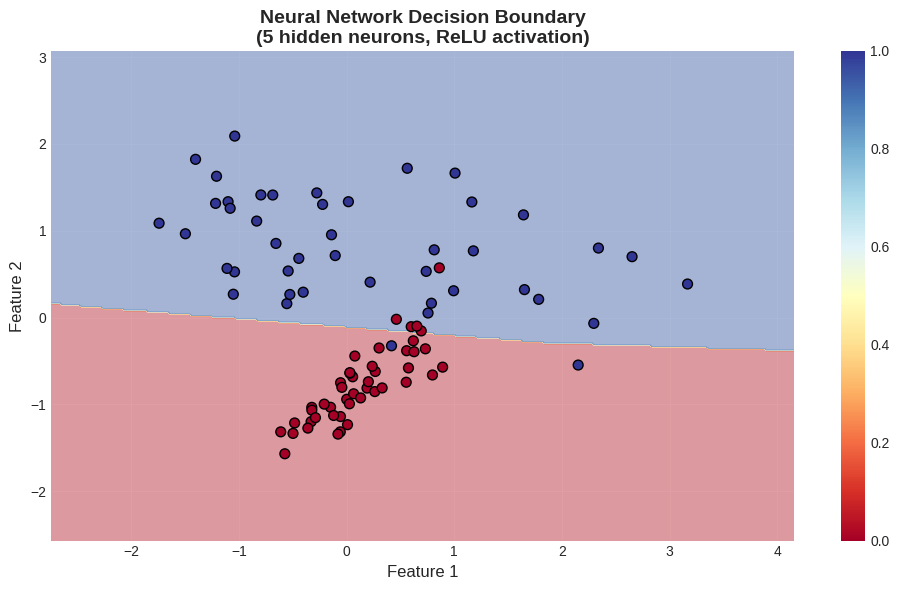

In [14]:
def plot_decision_boundary(X, y, model, title):
    """
    Plot decision boundary for a 2D classification problem.
    """
    # Create a mesh to plot in
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap='RdYlBu')
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_test_scaled, y_test, mlp, 
                      'Neural Network Decision Boundary\n(5 hidden neurons, ReLU activation)')

### Handling Non-Linear Problems

Neural networks excel at learning complex, non-linear patterns. Let's test them on the classic "moons" and "circles" datasets:


MOONS DATASET - TESTING DIFFERENT ARCHITECTURES
Moons Dataset: Neural Network with 2 Hidden Layers (10, 10)
Architecture: 2 -> 10 -> 10 -> 1
Train Accuracy: 0.9810
Test Accuracy: 1.0000
------------------------------------------------------------


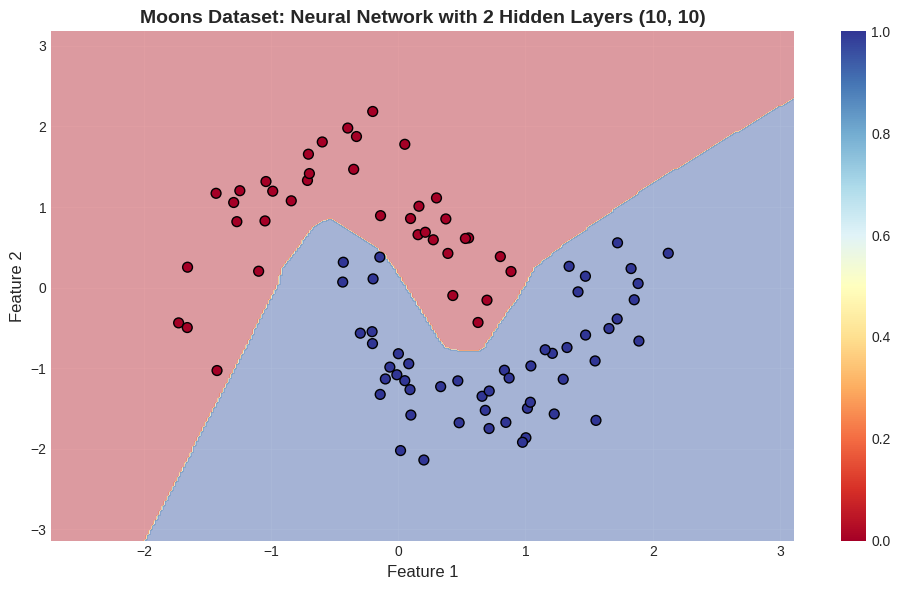

In [16]:
# Generate non-linear datasets
X_moons, y_moons = make_moons(n_samples=300, noise=0.15, random_state=42)
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

# Function to train and evaluate
def train_and_plot(X, y, hidden_layers, title):
    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, 
                       activation='relu',
                       solver='adam',
                       max_iter=2000,
                       random_state=42)
    mlp.fit(X_train_scaled, y_train)
    
    # Evaluate
    train_acc = mlp.score(X_train_scaled, y_train)
    test_acc = mlp.score(X_test_scaled, y_test)
    
    print(f"{title}")
    print(f"Architecture: 2 -> {' -> '.join(map(str, hidden_layers))} -> 1")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("-" * 60)
    
    # Plot
    plot_decision_boundary(X_test_scaled, y_test, mlp, title)
    
    return mlp

# Train on moons dataset with different architectures
print("\n" + "="*60)
print("MOONS DATASET - TESTING DIFFERENT ARCHITECTURES")
print("="*60)
mlp_moons = train_and_plot(X_moons, y_moons, (10, 10), 
                          'Moons Dataset: Neural Network with 2 Hidden Layers (10, 10)')


CIRCLES DATASET - TESTING DIFFERENT ARCHITECTURES
Circles Dataset: Neural Network with 2 Hidden Layers (15, 15)
Architecture: 2 -> 15 -> 15 -> 1
Train Accuracy: 0.9905
Test Accuracy: 1.0000
------------------------------------------------------------


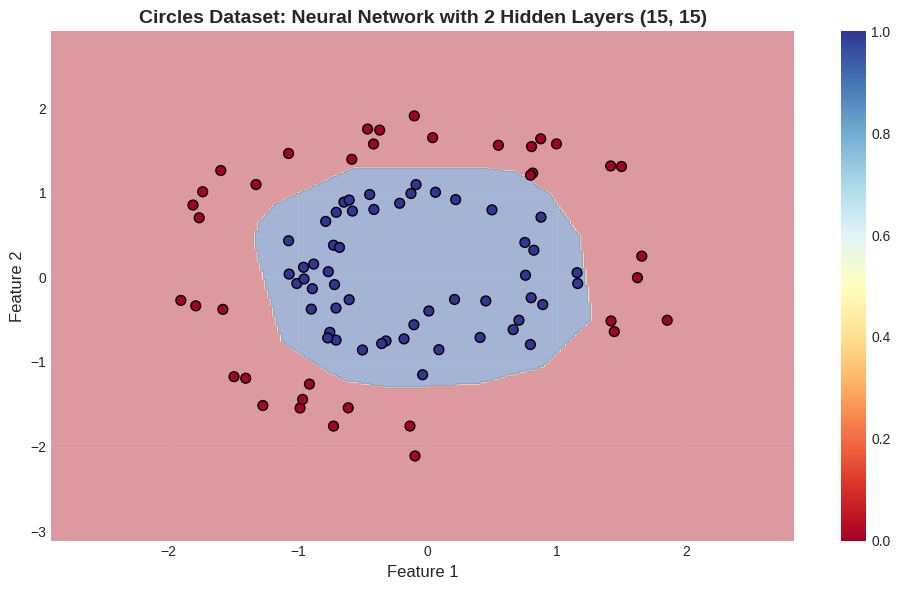

In [17]:
# Train on circles dataset
print("\n" + "="*60)
print("CIRCLES DATASET - TESTING DIFFERENT ARCHITECTURES")
print("="*60)
mlp_circles = train_and_plot(X_circles, y_circles, (15, 15), 
                            'Circles Dataset: Neural Network with 2 Hidden Layers (15, 15)')

### Effect of Network Depth

Let's explore how the number of hidden layers affects the network's ability to learn:


COMPARING DIFFERENT NETWORK ARCHITECTURES ON MOONS DATASET
Architecture: 2 -> 5 -> 1
Parameters: 21
Train Acc: 0.8667 | Test Acc: 0.8889
----------------------------------------------------------------------
Architecture: 2 -> 10 -> 1
Parameters: 41
Train Acc: 0.8714 | Test Acc: 0.8889
----------------------------------------------------------------------
Architecture: 2 -> 10 -> 10 -> 1
Parameters: 151
Train Acc: 0.9810 | Test Acc: 1.0000
----------------------------------------------------------------------
Architecture: 2 -> 20 -> 10 -> 5 -> 1
Parameters: 331
Train Acc: 0.9810 | Test Acc: 1.0000
----------------------------------------------------------------------


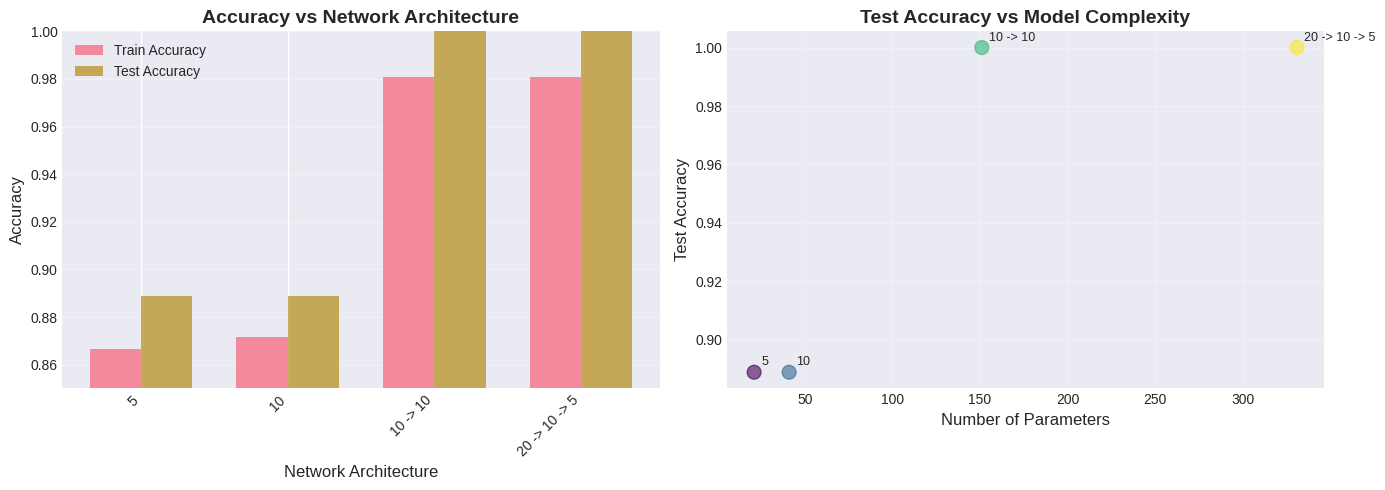

In [19]:
# Compare different architectures
architectures = [
    (5,),           # 1 hidden layer with 5 neurons
    (10,),          # 1 hidden layer with 10 neurons
    (10, 10),       # 2 hidden layers with 10 neurons each
    (20, 10, 5)     # 3 hidden layers
]

results = []

# Use moons dataset for comparison
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*70)
print("COMPARING DIFFERENT NETWORK ARCHITECTURES ON MOONS DATASET")
print("="*70)

for arch in architectures:
    mlp = MLPClassifier(hidden_layer_sizes=arch, 
                       activation='relu',
                       solver='adam',
                       max_iter=2000,
                       random_state=42)
    mlp.fit(X_train_scaled, y_train)
    
    train_acc = mlp.score(X_train_scaled, y_train)
    test_acc = mlp.score(X_test_scaled, y_test)
    n_params = sum(w.size for w in mlp.coefs_) + sum(b.size for b in mlp.intercepts_)
    
    results.append({
        'architecture': ' -> '.join(map(str, arch)),
        'depth': len(arch),
        'train_acc': train_acc,
        'test_acc': test_acc,
        'n_params': n_params
    })
    
    print(f"Architecture: 2 -> {' -> '.join(map(str, arch))} -> 1")
    print(f"Parameters: {n_params}")
    print(f"Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
    print("-" * 70)

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy comparison
x_pos = np.arange(len(results))
train_accs = [r['train_acc'] for r in results]
test_accs = [r['test_acc'] for r in results]
labels = [r['architecture'] for r in results]

width = 0.35
ax1.bar(x_pos - width/2, train_accs, width, label='Train Accuracy', alpha=0.8)
ax1.bar(x_pos + width/2, test_accs, width, label='Test Accuracy', alpha=0.8)
ax1.set_xlabel('Network Architecture', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Accuracy vs Network Architecture', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim([0.85, 1.0])

# Plot parameters vs accuracy
n_params = [r['n_params'] for r in results]
ax2.scatter(n_params, test_accs, s=100, alpha=0.6, c=range(len(results)), cmap='viridis')
for i, txt in enumerate(labels):
    ax2.annotate(txt, (n_params[i], test_accs[i]), fontsize=9, 
                xytext=(5, 5), textcoords='offset points')
ax2.set_xlabel('Number of Parameters', fontsize=12)
ax2.set_ylabel('Test Accuracy', fontsize=12)
ax2.set_title('Test Accuracy vs Model Complexity', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Real-World Application: Iris Flower Classification

Let's apply our neural network knowledge to a classic multi-class classification problem: the Iris dataset.

In [21]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Iris Dataset Information:")
print(f"Number of samples: {X_iris.shape[0]}")
print(f"Number of features: {X_iris.shape[1]}")
print(f"Feature names: {iris.feature_names}")
print(f"Target classes: {iris.target_names}")
print(f"Class distribution: {np.bincount(y_iris)}")

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train neural network for multi-class classification
# Architecture: 4 inputs -> 10 hidden -> 10 hidden -> 3 outputs
mlp_iris = MLPClassifier(hidden_layer_sizes=(10, 10),
                        activation='relu',
                        solver='adam',
                        max_iter=2000,
                        random_state=42)

mlp_iris.fit(X_train_scaled, y_train)

# Predictions
y_pred = mlp_iris.predict(X_test_scaled)

# Evaluate
print("\n" + "="*60)
print("NEURAL NETWORK PERFORMANCE ON IRIS DATASET")
print("="*60)
print(f"Architecture: {X_train.shape[1]} -> 10 -> 10 -> {len(np.unique(y_iris))}")
print(f"Training accuracy: {mlp_iris.score(X_train_scaled, y_train):.4f}")
print(f"Test accuracy: {mlp_iris.score(X_test_scaled, y_test):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Iris Dataset Information:
Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Class distribution: [50 50 50]

NEURAL NETWORK PERFORMANCE ON IRIS DATASET
Architecture: 4 -> 10 -> 10 -> 3
Training accuracy: 0.9714
Test accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




Confusion Matrix Interpretation:
Diagonal elements: Correctly classified samples
Off-diagonal elements: Misclassified samples
Total correct predictions: 45 out of 45


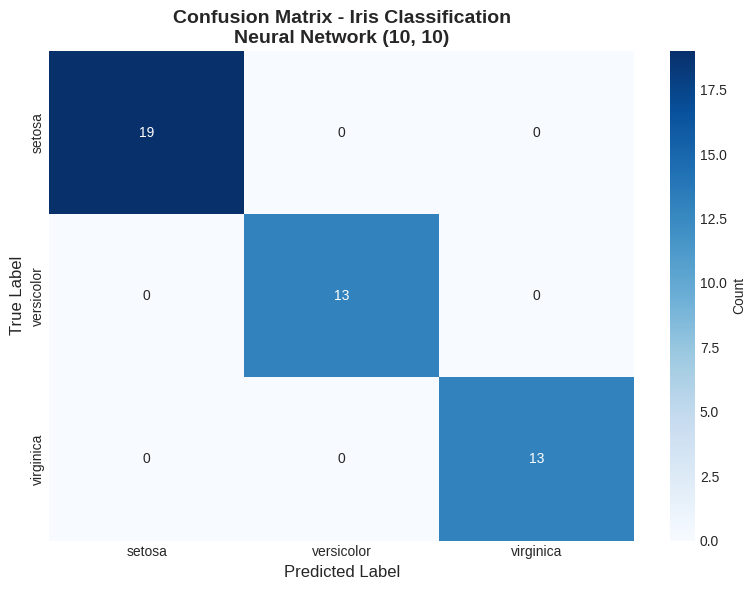

In [22]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Iris Classification\nNeural Network (10, 10)', 
         fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print("="*60)
print("Diagonal elements: Correctly classified samples")
print("Off-diagonal elements: Misclassified samples")
print(f"Total correct predictions: {np.trace(cm)} out of {cm.sum()}")

### Visualizing Training Progress

Understanding how the network learns over time is crucial. Let's track the loss during training:

Final training loss: 0.085536
Number of iterations: 500

The loss curve shows how the network's error decreases during training.
A smooth, decreasing curve indicates successful learning.


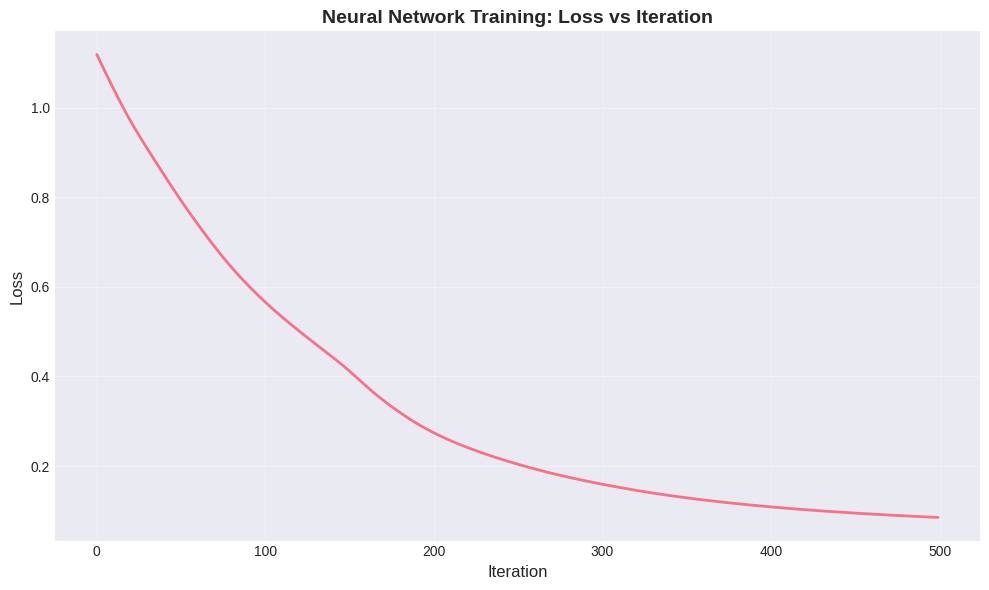

In [24]:
# Train a new model with verbose output to track loss
mlp_tracked = MLPClassifier(hidden_layer_sizes=(10, 10),
                           activation='relu',
                           solver='adam',
                           max_iter=500,
                           random_state=42,
                           verbose=False)  # Set to True to see training output

mlp_tracked.fit(X_train_scaled, y_train)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_tracked.loss_curve_, linewidth=2)
plt.title('Neural Network Training: Loss vs Iteration', fontsize=14, fontweight='bold')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training loss: {mlp_tracked.loss_:.6f}")
print(f"Number of iterations: {mlp_tracked.n_iter_}")
print(f"\nThe loss curve shows how the network's error decreases during training.")
print(f"A smooth, decreasing curve indicates successful learning.")

## Hands-On Exercise: Digit Classification

Now it's your turn! Let's work with the handwritten digits dataset. Your task is to:

1. Load the digits dataset
2. Explore the data
3. Build and train a neural network
4. Evaluate its performance
5. Experiment with different architectures

Digits Dataset Information:
Number of samples: 1797
Number of features (pixels): 64
Image shape: 8x8 pixels
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


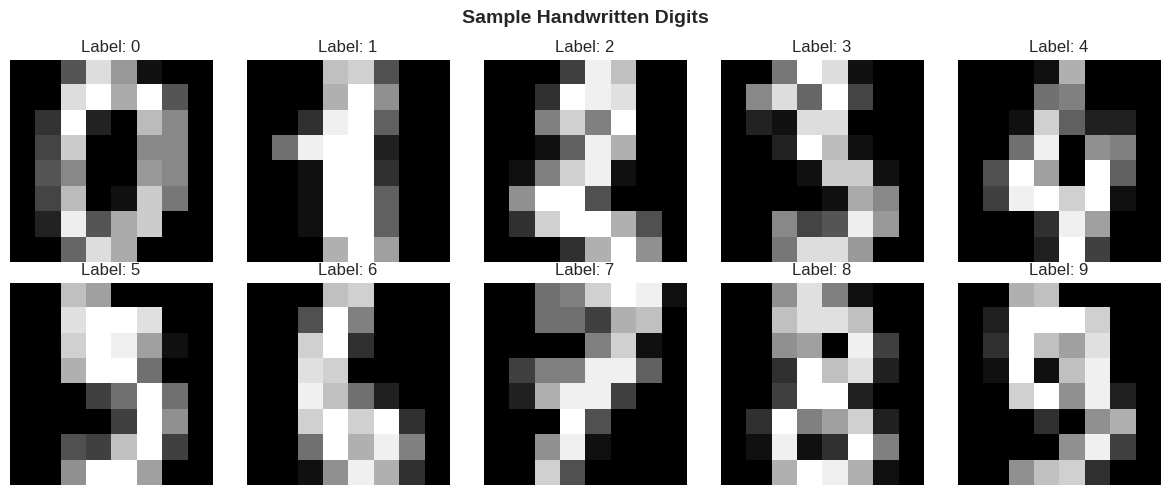

In [26]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print("Digits Dataset Information:")
print(f"Number of samples: {X_digits.shape[0]}")
print(f"Number of features (pixels): {X_digits.shape[1]}")
print(f"Image shape: 8x8 pixels")
print(f"Number of classes: {len(np.unique(y_digits))}")
print(f"Classes: {np.unique(y_digits)}")

# Visualize some samples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {y_digits[i]}', fontsize=12)
    ax.axis('off')
plt.suptitle('Sample Handwritten Digits', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [27]:
# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, 
                                                    test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
# Architecture: 64 inputs -> 128 hidden -> 64 hidden -> 10 outputs
mlp_digits = MLPClassifier(hidden_layer_sizes=(128, 64),
                          activation='relu',
                          solver='adam',
                          max_iter=1000,
                          random_state=42)

print("Training neural network on digits dataset...")
mlp_digits.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp_digits.predict(X_test_scaled)

# Evaluate
print("\n" + "="*60)
print("DIGIT CLASSIFICATION RESULTS")
print("="*60)
print(f"Architecture: 64 -> 128 -> 64 -> 10")
print(f"Training accuracy: {mlp_digits.score(X_train_scaled, y_train):.4f}")
print(f"Test accuracy: {mlp_digits.score(X_test_scaled, y_test):.4f}")
print(f"Number of parameters: {sum(w.size for w in mlp_digits.coefs_) + sum(b.size for b in mlp_digits.intercepts_)}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Training neural network on digits dataset...

DIGIT CLASSIFICATION RESULTS
Architecture: 64 -> 128 -> 64 -> 10
Training accuracy: 1.0000
Test accuracy: 0.9756
Number of parameters: 17226

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.97      0.97        37
           2       0.93      1.00      0.96        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.95      0.92      0.93        38
           9       0.98      0.98      0.98        48

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450




Number of misclassified samples: 11
Error rate: 2.44%


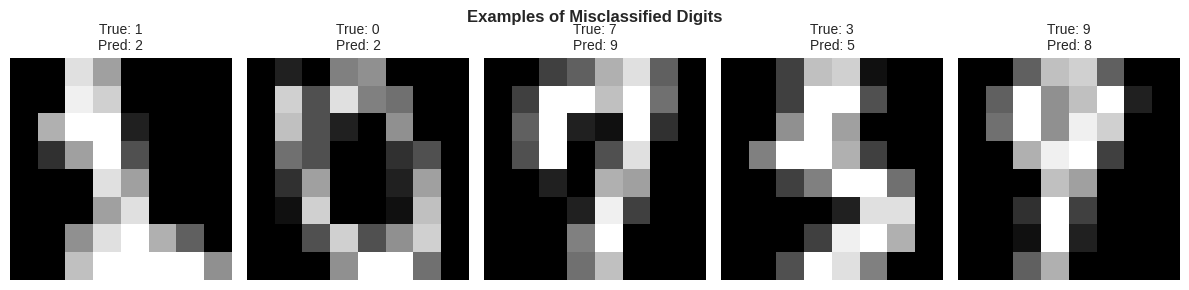

In [28]:
# Confusion matrix for digits
cm_digits = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_digits, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Handwritten Digit Classification\nNeural Network (128, 64)', 
         fontsize=14, fontweight='bold')
plt.ylabel('True Digit', fontsize=12)
plt.xlabel('Predicted Digit', fontsize=12)
plt.tight_layout()
plt.show()

# Find and display some misclassified examples
misclassified_idx = np.where(y_test != y_pred)[0]
if len(misclassified_idx) > 0:
    print(f"\nNumber of misclassified samples: {len(misclassified_idx)}")
    print(f"Error rate: {len(misclassified_idx) / len(y_test) * 100:.2f}%")
    
    # Show some misclassified examples
    n_show = min(5, len(misclassified_idx))
    fig, axes = plt.subplots(1, n_show, figsize=(12, 3))
    for i, idx in enumerate(misclassified_idx[:n_show]):
        # Get the original index in the test set
        original_idx = X_test.shape[0] - len(y_test) + idx
        # Reshape to 8x8 image
        img = X_test[idx].reshape(8, 8)
        if n_show > 1:
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}', fontsize=10)
            axes[i].axis('off')
        else:
            axes.imshow(img, cmap='gray')
            axes.set_title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}', fontsize=10)
            axes.axis('off')
    plt.suptitle('Examples of Misclassified Digits', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("\nPerfect classification! No errors on test set.")

Initial loss: 2.270070
Final loss: 0.002516
Loss reduction: 99.89%


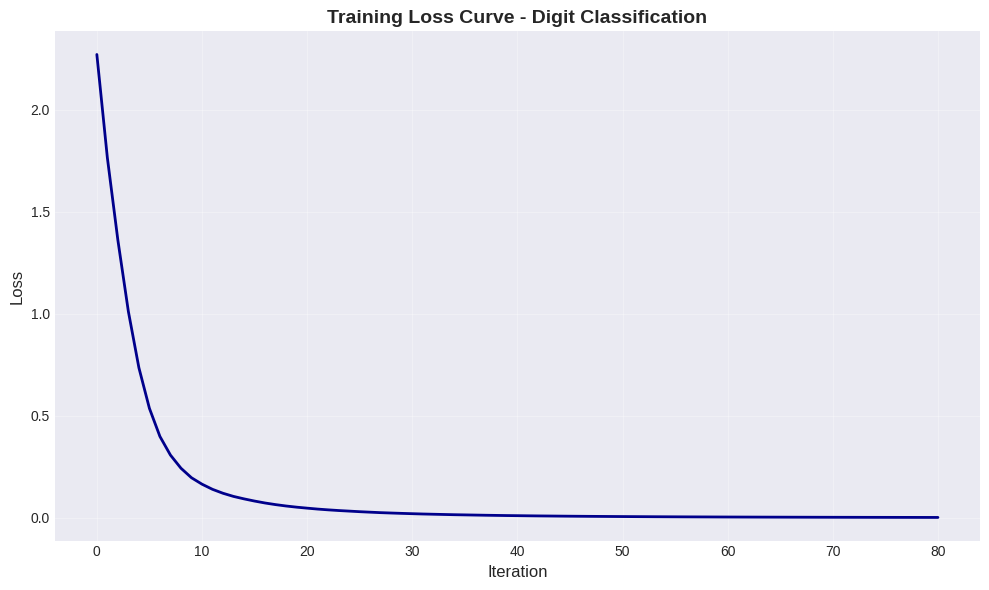

In [29]:
# Plot training curve for digits model
plt.figure(figsize=(10, 6))
plt.plot(mlp_digits.loss_curve_, linewidth=2, color='darkblue')
plt.title('Training Loss Curve - Digit Classification', fontsize=14, fontweight='bold')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Initial loss: {mlp_digits.loss_curve_[0]:.6f}")
print(f"Final loss: {mlp_digits.loss_curve_[-1]:.6f}")
print(f"Loss reduction: {(1 - mlp_digits.loss_curve_[-1]/mlp_digits.loss_curve_[0])*100:.2f}%")

## Key Takeaways

Congratulations! You've completed your introduction to neural networks. Let's summarize the key concepts:

### Core Concepts

1. **Neural Networks are Universal Function Approximators**: They can learn complex, non-linear relationships in data by combining simple computations across multiple layers.

2. **Architecture Matters**: The number of layers (depth) and neurons per layer (width) significantly impact a network's capacity to learn. Deeper networks can learn more complex patterns but require more data and computation.

3. **Activation Functions Introduce Non-Linearity**: Without activation functions, even deep networks would be equivalent to linear models. ReLU is the most popular choice for hidden layers due to its computational efficiency and ability to mitigate vanishing gradients.

4. **Feature Scaling is Essential**: Neural networks are sensitive to the scale of input features. Always standardize or normalize your data before training.

5. **Forward Propagation**: Neural networks make predictions through forward propagation, passing inputs through successive layers of weighted computations and activations.

### Practical Skills

- Building neural networks with scikit-learn's MLPClassifier
- Configuring network architecture (hidden layers, activation functions, solvers)
- Preprocessing data for neural networks (scaling)
- Evaluating neural network performance
- Visualizing decision boundaries and training progress
- Interpreting confusion matrices for multi-class problems

### What's Next?

In upcoming lessons, you'll learn:
- **Backpropagation**: How neural networks learn by computing gradients
- **Optimization algorithms**: SGD, Adam, and other training techniques
- **Regularization**: Preventing overfitting in neural networks
- **Convolutional Neural Networks (CNNs)**: Specialized architectures for image data
- **Recurrent Neural Networks (RNNs)**: Handling sequential data

## Further Resources

To deepen your understanding of neural networks, explore these resources:

### Documentation and Tutorials

1. **scikit-learn Neural Networks Guide**  
   https://scikit-learn.org/stable/modules/neural_networks_supervised.html  
   Official documentation for MLPClassifier and MLPRegressor

2. **Neural Networks and Deep Learning (Free Online Book)**  
   http://neuralnetworksanddeeplearning.com/  
   Excellent introduction to neural networks with interactive visualizations

3. **3Blue1Brown: Neural Networks Series**  
   https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi  
   Beautiful visual explanations of how neural networks work

4. **Deep Learning Specialization by Andrew Ng**  
   https://www.coursera.org/specializations/deep-learning  
   Comprehensive course covering neural networks and deep learning

5. **TensorFlow Playground**  
   https://playground.tensorflow.org/  
   Interactive visualization tool to experiment with neural networks in your browser

### Academic Papers (Historical)

6. **Rosenblatt, F. (1958). The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain**  
   The original perceptron paper that started it all

7. **Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). Learning representations by back-propagating errors**  
   Introduced the backpropagation algorithm

### Practice Datasets

- **UCI Machine Learning Repository**: https://archive.ics.uci.edu/ml/  
- **Kaggle Datasets**: https://www.kaggle.com/datasets  
- **OpenML**: https://www.openml.org/

### Next Steps

Ready to go deeper? Consider exploring:
- **TensorFlow**: https://www.tensorflow.org/  
- **PyTorch**: https://pytorch.org/  
- **Keras**: https://keras.io/  

These frameworks offer more flexibility and are industry standards for deep learning.

---

## Conclusion

You've taken your first steps into the exciting world of neural networks and deep learning! You now understand the fundamental concepts that power modern AI systems, from the simple perceptron to multi-layer networks capable of learning complex patterns.

Remember: neural networks are powerful tools, but they're not magic. Success comes from:
- Understanding your data
- Choosing appropriate architectures
- Proper preprocessing and feature scaling
- Careful evaluation and iteration

Keep experimenting, stay curious, and happy learning!

**Next Lesson**: We'll dive deeper into activation functions and the backpropagation algorithm that enables neural networks to learn.